# Problem Statement 6
## Use non-parametric K-Nearest Neighbor (KNN) techniques to classify grayscale images of shapes (e.g., circles, squares, and triangles). Evaluate and compare the classification accuracy of both methods.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity, KNeighborsClassifier

In [14]:
def generate_shape(shape, size=64):
    img = np.zeros((size, size), dtype=np.uint8)
    center = (size // 2, size // 2)
    if shape == "circle":
        cv2.circle(img, center, size // 3, 255, -1)
    elif shape == "square":
        cv2.rectangle(img, (size//4, size//4), (3*size//4, 3*size//4), 255, -1)
    elif shape == "triangle":
        pts = np.array([[size//2, size//5], [size//5, 4*size//5], [4*size//5, 4*size//5]], np.int32)
        cv2.fillPoly(img, [pts], 255)
    return img

In [16]:
def create_dataset(num_samples=100):
    shapes = ["circle", "square", "triangle"]
    X, y = [], []
    for i, shape in enumerate (shapes):
        for _ in range(num_samples):
            img = generate_shape(shape)
            X.append(img.flatten())
            y.append(i)
    return np.array (X), np.array(y)

print("Generating dataset...")
X, y = create_dataset (300)

Generating dataset...


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
parzen_kde = []
bandwidth = 0.1 # You can tune this
for i in range(3): # One KDE per class
    kde = KernelDensity (kernel="gaussian", bandwidth=bandwidth)
    kde.fit(X_train[y_train== 1])
    parzen_kde.append(kde)

In [30]:
def parzen_predict(X):
    scores = np.array([kde.score_samples (X) for kde in parzen_kde]).T
    return np.argmax(scores, axis=1)

y_pred_parzen = parzen_predict(X_test)
parzen_acc = accuracy_score(y_test, y_pred_parzen)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [34]:
print(f"Parzen-window Accuracy: {parzen_acc:.2f}")
print(f"k-NN Accuracy: {knn_acc:.2f}")

Parzen-window Accuracy: 0.33
k-NN Accuracy: 1.00


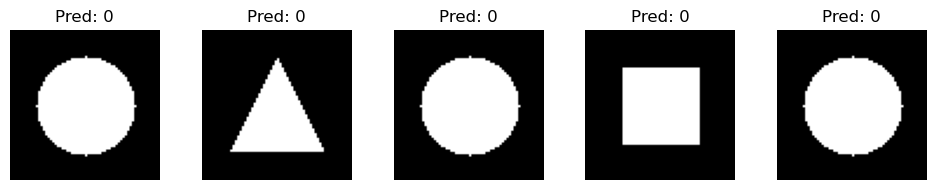

In [40]:
fig, axes = plt.subplots (1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_test[i].reshape (64, 64), cmap="gray")
    axes[i].set_title(f"Pred: {y_pred_parzen[i]}")
    axes[i].axis("off")
    plt.tight_layout()
plt.show()